# <b>1 <span style='color:#F86246'>|</span> INTRODUCTION</b>

**In this work, I will make an exploratory data analysis for the military spending of all countries on Earth for the period from 1970 to 2020**

**Dataset source: Dataset source: download and add the file in the google colab!**

**As part of the machine learning project, EDA is doing to:**
1. Study of the target feature  
2. Study features
3. Study of the influence of features on the target

**EDA is an important step in building a machine learning project, as it can visually evaluate the data and build hypotheses**

# <b>2 <span style='color:#F86246'>|</span> MAIN PART</b>

#      <b>2.1 <span style='color:#F86246'>|</span> Library import</b>

In [1]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')  # ignore notifications
np.set_printoptions(suppress=True)  # Removing the scientific record in numpy
pd.set_option('display.float_format', '{:.10g}'.format)  # Removing the scientific record in pandas

# <b>2.2 <span style='color:#F86246'>|</span> Dataset</b>

In [3]:
PATH = 'military_expenditure.csv'
df = pd.read_csv(PATH)

In [4]:
df

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2939585.501,NaN,1.629606099,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3341271.551,NaN,1.868910256,South Asia,Low income
4,Afghanistan,AFG,AF,1974,3581366.351,NaN,1.610824742,South Asia,Low income
...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,358065000,7.363047502,1.742493552,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,340522000,5.519889771,1.544948051,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,420364000,5.607096172,1.222794967,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,546939000,2.099815718,0.6986009732,Sub-Saharan Africa (excluding high income),Lower middle income


In [5]:
df.describe()  # statistical characteristics

,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP)
count,13566,8769,5282,8777
mean,1995,3.676065364e+10,7.658513985,2.722603135
std,14.72014399,1.422586907e+11,6.04893812,2.921869003
min,1970,0,0,0
25%,1982,120000000,3.665614404,1.32720743
50%,1995,1148445710,6.033675205,2.013004573
75%,2008,8533090258,9.996249454,3.218260665
max,2020,1.928852478e+12,57.47809762,117.3498232


In [6]:
print(f'Dataset size: {df.shape}')

Dataset size: (13566, 9)


In [7]:
print(f'Columns:\n {list(df.columns)}')

Columns:
 ['country', 'iso3c', 'iso2c', 'year', 'Military expenditure (current USD)', 'Military expenditure (% of general government expenditure)', 'Military expenditure (% of GDP)', 'adminregion', 'incomeLevel']


In [8]:
print(f'Data types: {df.dtypes}')

Data types: country                                                        object
iso3c                                                          object
iso2c                                                          object
year                                                            int64
Military expenditure (current USD)                            float64
Military expenditure (% of general government expenditure)    float64
Military expenditure (% of GDP)                               float64
adminregion                                                    object
incomeLevel                                                    object
dtype: object


In [9]:
print(f'Number of missing values:\n{df.isna().sum()}')

Number of missing values:
country                                                          0
iso3c                                                          102
iso2c                                                          153
year                                                             0
Military expenditure (current USD)                            4797
Military expenditure (% of general government expenditure)    8284
Military expenditure (% of GDP)                               4789
adminregion                                                   6579
incomeLevel                                                    102
dtype: int64


In [10]:
countries = df.country.unique().tolist()
print(f'All countries:\n{countries}')

All countries:
['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (I

In [11]:
# We will remove the excess for convenienc of analysis
rf = df.loc[df['incomeLevel'] != 'Aggregates', :]

# <b> <span style='color:#F86246'>|</span> GRAPH №1</b>

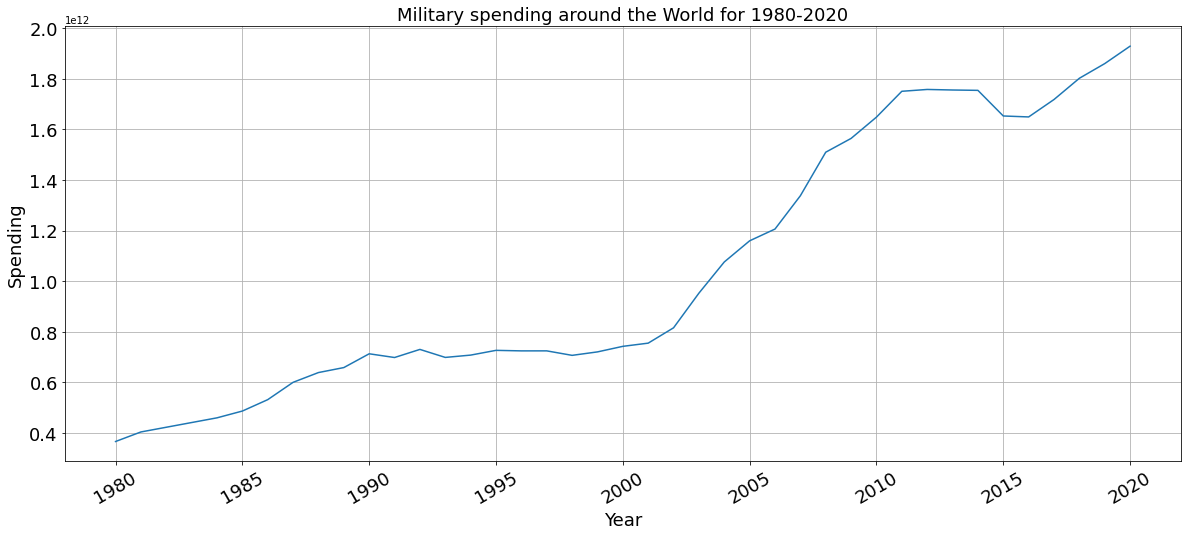

In [12]:
plt.figure(figsize=(20,8))
years = [i for i in range(df['year'].min(), df['year'].max() + 1)]
plt.grid()
world_military_expenditure = df[df['country'] == 'World']['Military expenditure (current USD)']
sns.lineplot(years, world_military_expenditure)
plt.title('Military spending around the World for 1980-2020', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Spending', fontsize=18)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Сonclusions from the graph №1:
- Between 1990 and 2000 сhanges are insignificantly
- Between 2014 and 2020,  military spending around the world did not change  
- Sharp increase is noted in the period from 2002 to 2012

# <b> <span style='color:#F86246'>|</span> GRAPH №2</b>

In [13]:
max_min = rf.groupby('country').max()['Military expenditure (current USD)'] - rf.groupby('country').min()['Military expenditure (current USD)']
top_10 = max_min.nlargest(10)

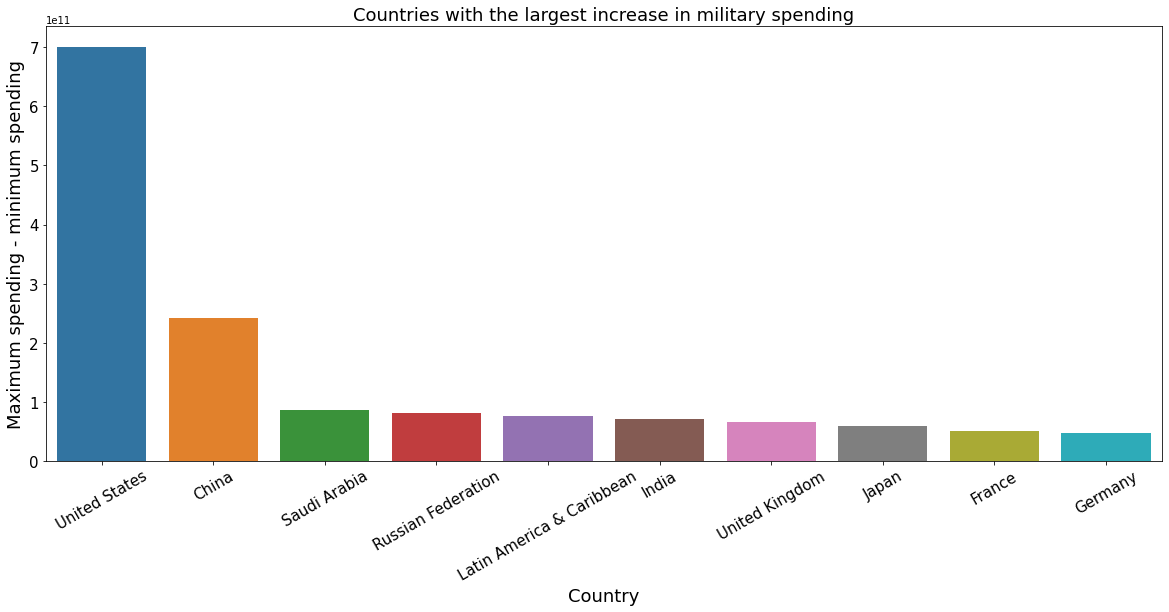

In [14]:
plt.figure(figsize=(20, 8))
plt.title('Countries with the largest increase in military spending', fontsize=18)
plt.ylabel('Maximum spending - minimum spending', fontsize=18)
sns.barplot(top_10.index, top_10.values)
plt.xticks(rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Country', fontsize=18)
plt.show()

Сonclusions from the graph №2:  
For the period 1970-2020, America's largest increase in military spending

# <b> <span style='color:#F86246'>|</span> GRAPH №3,4</b>

In [15]:
top_5 = rf.groupby('country').sum()['Military expenditure (current USD)'].nlargest(5)
top_5 = list(top_5.index)

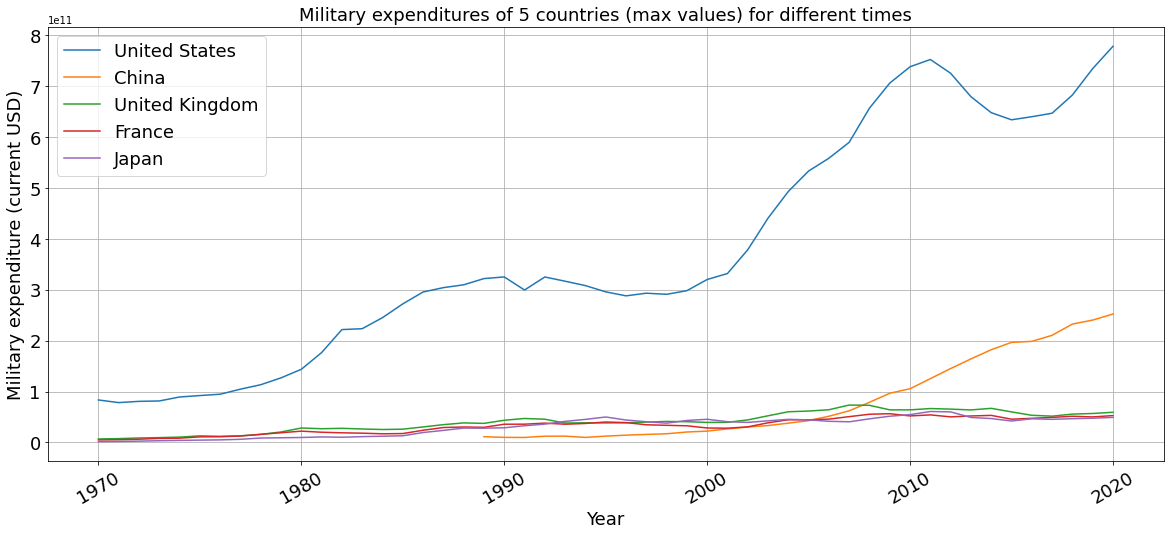

In [16]:
def plotter_1(top_5):
    plt.figure(figsize=(20, 8))
    plt.title('Military expenditures of 5 countries (max values) for different times', fontsize=18)
    YEARS = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    for top_country in top_5:
        EXPENDITURE = df.loc[df['country'] == top_country, 'Military expenditure (current USD)']
        sns.lineplot(YEARS, EXPENDITURE, label=top_country)
    plt.legend(fontsize=18)
    plt.xticks(rotation=30, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Military expenditure (current USD)', fontsize=18)
    
    


plotter_1(top_5)
plt.grid()    

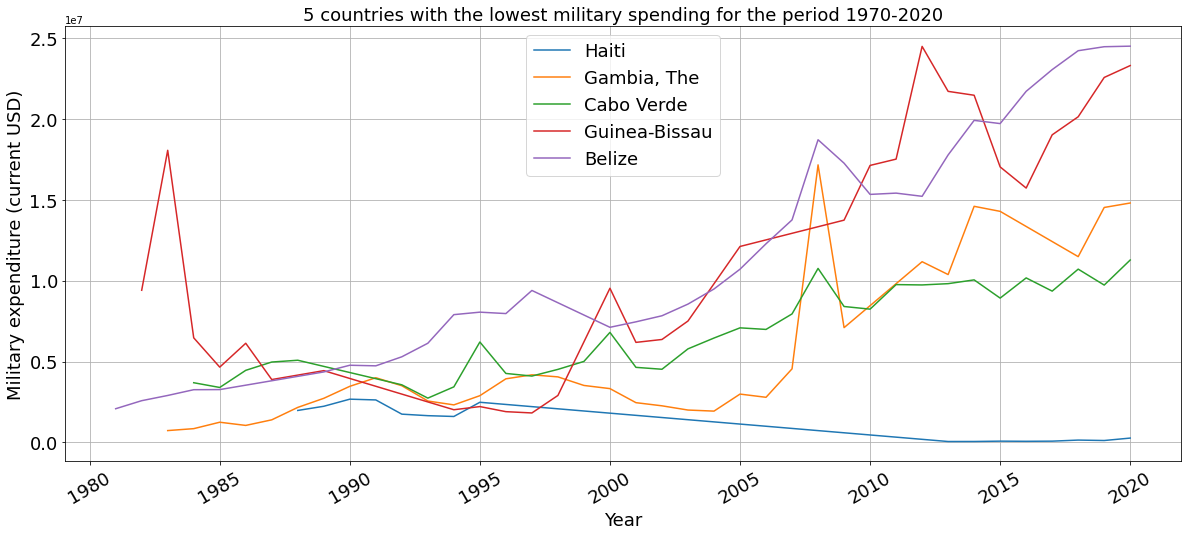

In [17]:
tf = df.loc[df['Military expenditure (current USD)'] > 0,:]
smallest_5 = tf.groupby('country').sum()['Military expenditure (current USD)'].nsmallest(5)
smallest_5 = list(smallest_5.index)
def plotter_10(smallest_5):
    plt.figure(figsize=(20, 8))
    plt.title('5 countries with the lowest military spending for the period 1970-2020', fontsize=18)
    YEARS = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    for top_country in smallest_5:
        EXPENDITURE = df.loc[df['country'] == top_country, 'Military expenditure (current USD)']
        sns.lineplot(YEARS, EXPENDITURE, label=top_country)
    plt.legend(fontsize=18)
    plt.xticks(rotation=30, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Military expenditure (current USD)', fontsize=18)
    
    
plotter_10(smallest_5)
plt.grid() 

Сonclusions from the graph №3,4:
* For the period 1970-2020, America's military spending is always more than other countries

# <b> <span style='color:#F86246'>|</span> GRAPH №5,6</b>

In [18]:
def plotter_2(Income, n):
    fig, ax = plt.subplots(figsize=(20, 8))
    hf = df.loc[df['incomeLevel'] == Income, ['country','Military expenditure (% of GDP)']]
    random.choices(hf['country'].tolist(), k=n)
    hf = hf.loc[hf['country'].isin(random.choices(hf['country'].tolist(), k=n)), :]
    group = hf.groupby('country')
    max_Military_expenditure = group.max()['Military expenditure (% of GDP)']
    min_Military_expenditure = group.min()['Military expenditure (% of GDP)']
    ax.set_title(f'Analysis of {Income} countries', fontsize=17)
    width = 0.3
    x = np.arange(len(max_Military_expenditure.index.tolist()))
    ax.bar(x - width/2, max_Military_expenditure.values, width=0.3, label='Maximum % of GPD')
    ax.bar(x + width/2, min_Military_expenditure.values, width=0.3, label='Maximum % of GPD')
    ax.set_xticks(x)
    ax.set_xticklabels(max_Military_expenditure.index.tolist(), rotation=90, fontsize=13)
    plt.grid()
    ax.legend(fontsize=15, loc=1)
    ax.set_xlabel('Country', fontsize=16)
    ax.set_ylabel('Military expenditure (% of GDP)', fontsize=16)
    plt.yticks(fontsize=15)
    plt.show()

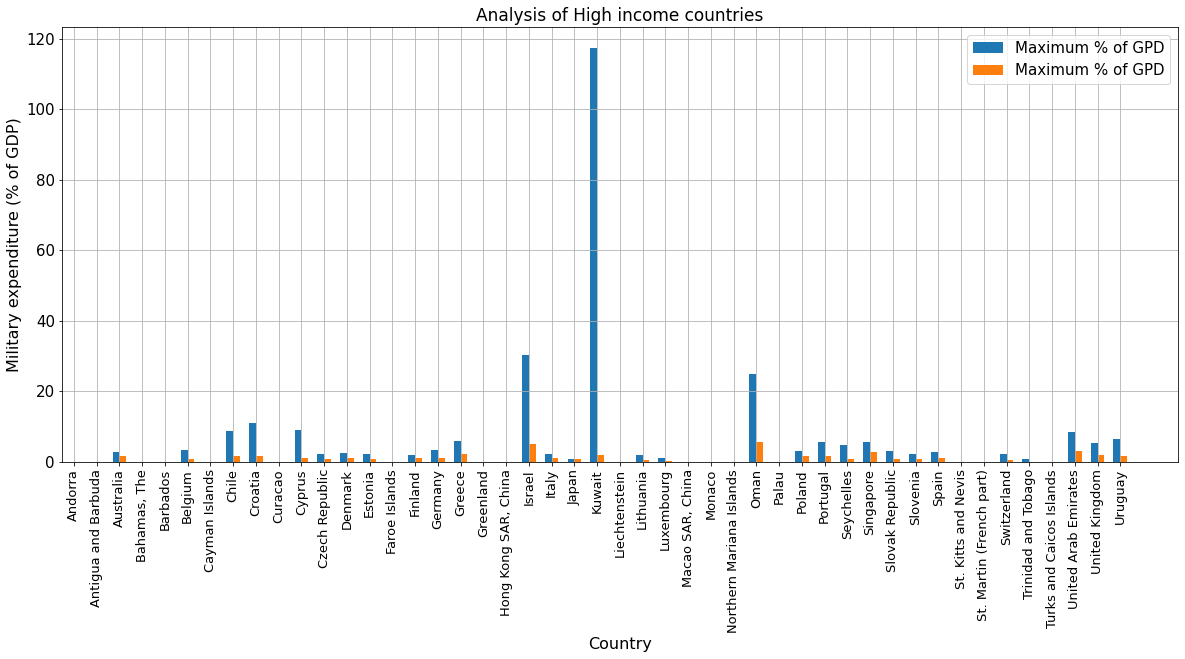

In [19]:
plotter_2('High income', 70)  

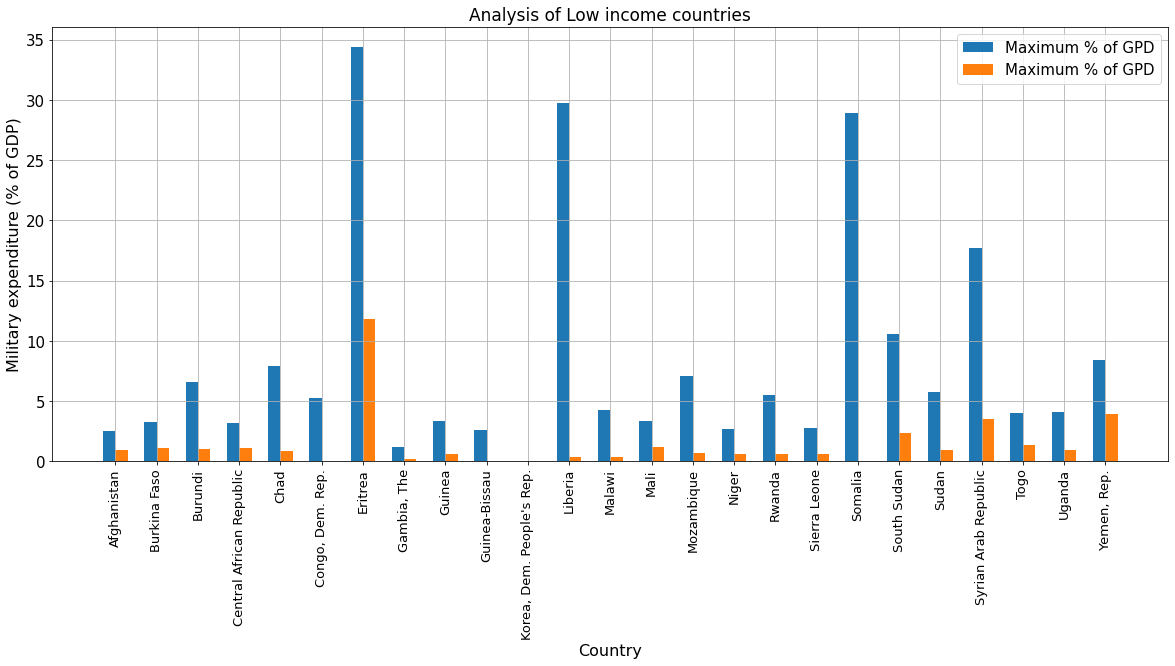

In [20]:
plotter_2('Low income', 70)

Сonclusions from the graph №5,6:
* From graphs 4, 5 we can see the maximum and minimum military spending (% of GPD) for high and low income countries.
* For the period 1970–2020 highest military spending (% of GPD) among low-income countries led by Eritrea
* for the period 1970–2020 highest military spending (% of GPD) among high-income countries Kuwait leads

# <b> <span style='color:#F86246'>|</span> GRAPH №7</b>

In [21]:
income_level_list = df['incomeLevel'].dropna().unique().tolist()
income_level_list.remove('Not classified')
income_level_list.remove('Aggregates')
income_level_list

['Low income', 'Upper middle income', 'Lower middle income', 'High income']

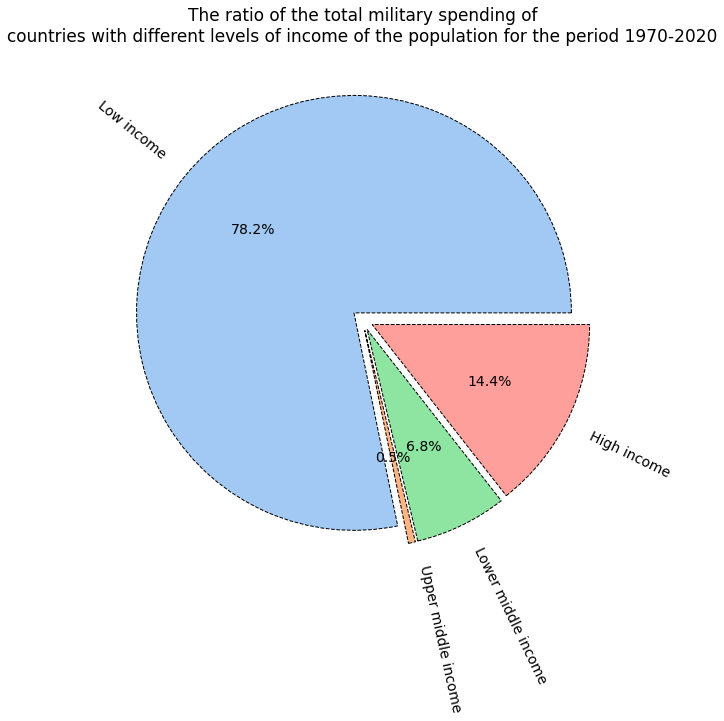

In [22]:
ef = pd.DataFrame(df.groupby('incomeLevel').sum()['Military expenditure (current USD)'])
ef.drop(index=['Aggregates', 'Not classified'], inplace=True)
explode = (0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=(10, 10))
plt.title('''The ratio of the total military spending of
countries with different levels of income of the population for the period 1970-2020''', fontsize=17)
plt.pie(ef['Military expenditure (current USD)'], labels=income_level_list, autopct='%1.1f%%', shadow=False,
        wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'}, rotatelabels=True, explode=explode,
        colors = sns.color_palette('pastel')[0:4], textprops={'fontsize': 14})
plt.show()

Сonclusions from the graph №7:  
The chart shows that low income countries have the highest total military spending

# <b> <span style='color:#F86246'>|</span> GRAPH №8</b>

In [23]:
df_update = df[df['country'].isin(['Low income', 'Lower middle income','Upper middle income', 'High income'])]
df_update = df_update.loc[:, ['country', 'year', 'Military expenditure (% of general government expenditure)']]

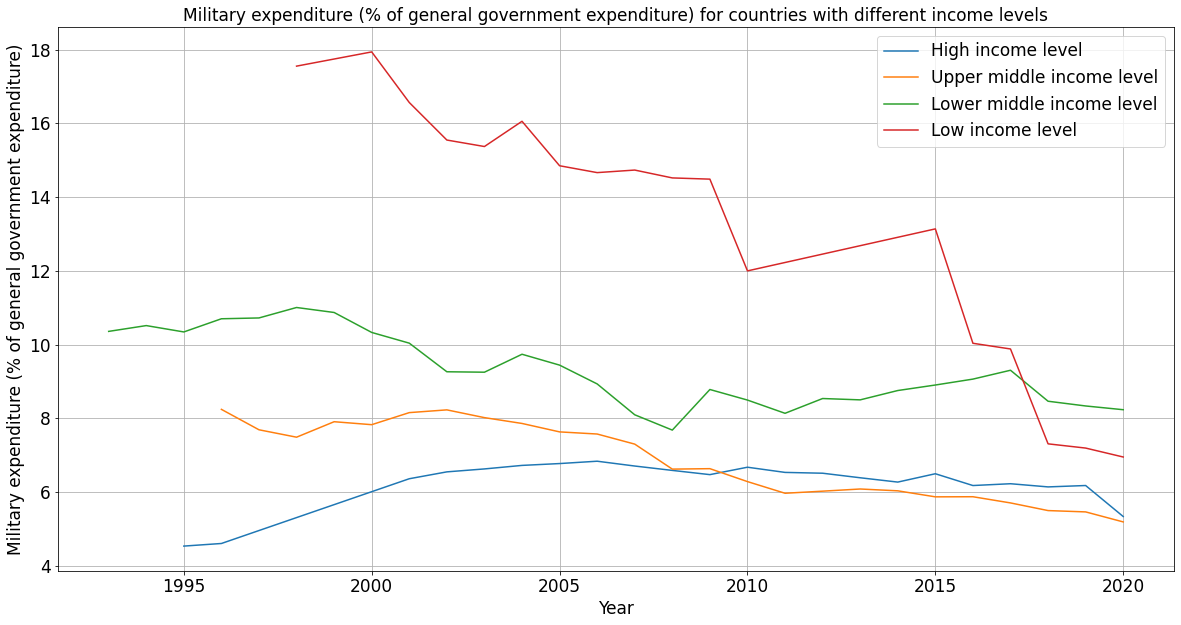

In [24]:
plt.figure(figsize=(20, 10))
def plotter_3(income_level):
    plt.title('Military expenditure (% of general government expenditure) for countries with different income levels', fontsize=17)
    plt.xlabel('Year', fontsize=17)
    plt.ylabel('Military expenditure (% of general government expenditure)', fontsize=17)
    plt.grid()
    years = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    sns.lineplot(years, df_update[df_update['country'] == income_level]['Military expenditure (% of general government expenditure)'],
                 label=f'{income_level} level')
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.legend(fontsize=17)

    
plt.grid()
    
plotter_3('High income')
plotter_3('Upper middle income')
plotter_3('Lower middle income')
plotter_3('Low income')

Сonclusions from the graph №8:  
And low income level countries lead the way, although military expenditure (% of general government expenditure) has declined over the past 15 years
